The dataset is from Kaggle: https://www.kaggle.com/datasets/borapajo/food-choices

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("food_coded.csv")
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


## Objective: Investigation of Is there any relationship between emotional triggrs (Mostly Boredom and stress) and unhealthy diet and food choices? and are those affect on student's GPA?

So first we start with data reviewing and preprocessing, such as cleaning, changing data types and handling missing values or finding outliers.

In [3]:
df.shape

(125, 61)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [5]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [6]:
df.isnull().sum()

GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         26
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64

In [7]:
df.isnull().sum()[df.isnull().sum() > 0]

GPA                            2
calories_day                  19
calories_scone                 1
comfort_food                   1
comfort_food_reasons           2
comfort_food_reasons_coded    19
cook                           3
cuisine                       17
diet_current                   1
drink                          2
eating_changes                 3
employment                     9
exercise                      13
father_education               1
father_profession              3
fav_cuisine                    2
fav_food                       2
food_childhood                 1
healthy_meal                   1
ideal_diet                     1
income                         1
life_rewarding                 1
marital_status                 1
meals_dinner_friend            3
mother_education               3
mother_profession              2
on_off_campus                  1
persian_food                   1
self_perception_weight         1
soup                           1
sports    

As we can see, our data is include so much missing data so we should fill those missed data with appropriate values.

In [8]:
df['calories_day'] = df['calories_day'].ffill()

In [9]:
df.isnull().sum()[df.isnull().sum() > 0]

GPA                            2
calories_day                   1
calories_scone                 1
comfort_food                   1
comfort_food_reasons           2
comfort_food_reasons_coded    19
cook                           3
cuisine                       17
diet_current                   1
drink                          2
eating_changes                 3
employment                     9
exercise                      13
father_education               1
father_profession              3
fav_cuisine                    2
fav_food                       2
food_childhood                 1
healthy_meal                   1
ideal_diet                     1
income                         1
life_rewarding                 1
marital_status                 1
meals_dinner_friend            3
mother_education               3
mother_profession              2
on_off_campus                  1
persian_food                   1
self_perception_weight         1
soup                           1
sports    

In [10]:
df['comfort_food_reasons_coded'] = df['comfort_food_reasons_coded'].fillna(df['comfort_food_reasons_coded'].mean())

In [11]:
df['type_sports'] = df['type_sports'].fillna('Unknown')

In [12]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns]

for column in numeric_columns:
    column_mean = df[column].mean()
    df[column].fillna(column_mean, inplace=True)

/var/folders/rx/gf7_x1gs5pv1b_4ykdybgr5h0000gn/T/ipykernel_66291/1507260537.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(column_mean, inplace=True)


In [13]:
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
mean_weight = df['weight'].mean()
df['weight'].fillna(mean_weight, inplace=True)
df['weight'].unique()

/var/folders/rx/gf7_x1gs5pv1b_4ykdybgr5h0000gn/T/ipykernel_66291/1015396968.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weight'].fillna(mean_weight, inplace=True)


array([187. , 155. , 158.5, 190. , 180. , 137. , 125. , 116. , 110. ,
       264. , 123. , 185. , 145. , 170. , 135. , 165. , 175. , 195. ,
       105. , 160. , 167. , 115. , 205. , 128. , 150. , 140. , 120. ,
       100. , 113. , 168. , 169. , 200. , 265. , 192. , 118. , 210. ,
       112. , 130. , 127. , 129. , 260. , 184. , 230. , 138. , 156. ])

In [14]:
df.isnull().sum()[df.isnull().sum() > 0]

GPA                     2
comfort_food            1
comfort_food_reasons    2
diet_current            1
eating_changes          3
father_profession       3
fav_cuisine             2
food_childhood          1
healthy_meal            1
ideal_diet              1
meals_dinner_friend     3
mother_profession       2
dtype: int64

In [15]:
df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce')
mean_GPA = df['GPA'].mean()
df['GPA'].fillna(mean_GPA, inplace=True)
df['GPA'].unique()

/var/folders/rx/gf7_x1gs5pv1b_4ykdybgr5h0000gn/T/ipykernel_66291/3312477553.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GPA'].fillna(mean_GPA, inplace=True)


array([2.4       , 3.654     , 3.3       , 3.2       , 3.5       ,
       2.25      , 3.8       , 3.904     , 3.4       , 3.6       ,
       3.1       , 3.41555833, 4.        , 2.2       , 3.87      ,
       3.7       , 3.9       , 2.8       , 3.        , 3.65      ,
       3.89      , 2.9       , 3.605     , 3.83      , 3.292     ,
       3.35      , 2.6       , 3.67      , 3.73      , 2.71      ,
       3.68      , 3.75      , 3.92      , 3.77      , 3.63      ,
       3.882     ])

In [16]:
categorical_columns = df.select_dtypes(include="object").columns
for col in categorical_columns:
    df[col] = df[col].fillna("Unknown")

In [17]:
df.isnull().sum()

GPA                 0
Gender              0
breakfast           0
calories_chicken    0
calories_day        0
                   ..
type_sports         0
veggies_day         0
vitamins            0
waffle_calories     0
weight              0
Length: 61, dtype: int64

In [18]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

Now that we don't have any missing values we can start to use visualizations and statistics to gain insight from our data and find some correlation between the value and features we mentioned in our objective.
so in this step we need seaborn and matplotlib libraries for visualization to use histogram, boxplot, heatmap, and scatter plots.

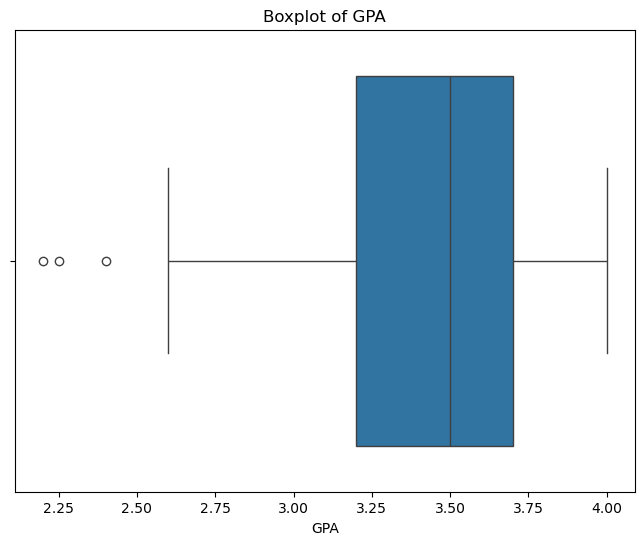

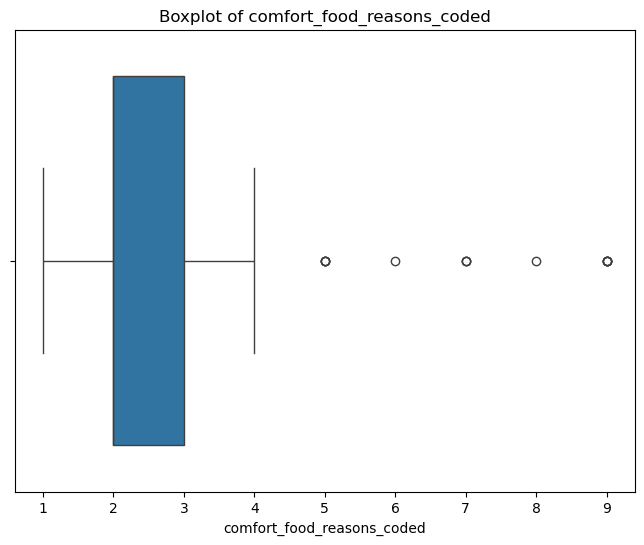

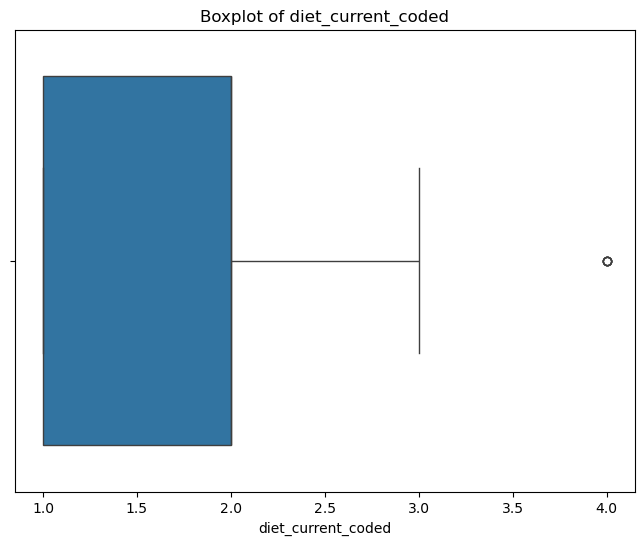

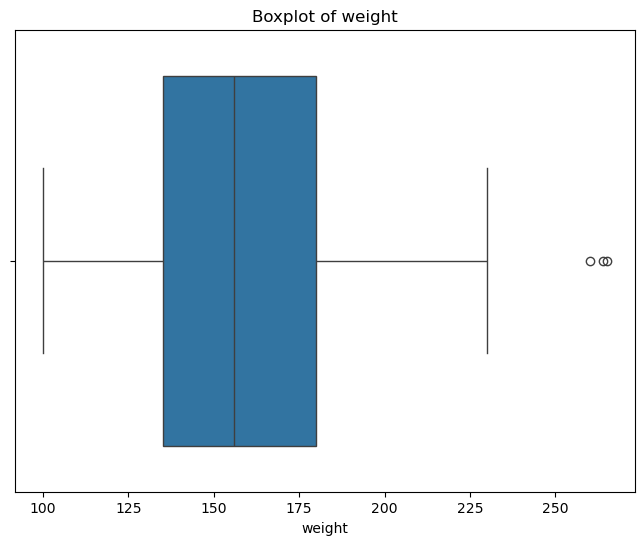

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
selected_features = ['GPA', 'comfort_food_reasons_coded', 'diet_current_coded', 'weight']
for col in selected_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

Text(0.5, 1.0, 'GPA Distribution')

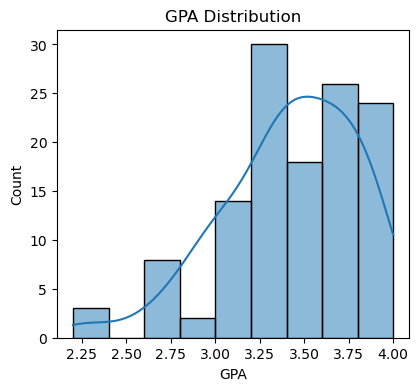

In [20]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['GPA'], kde=True)
plt.title('GPA Distribution')

In [21]:
df['comfort_food_reasons_coded'].unique()

array([9.        , 1.        , 2.        , 4.        , 3.        ,
       7.        , 6.        , 5.        , 8.        , 2.69811321])

In [22]:
df['comfort_food_reasons_coded'].value_counts()

comfort_food_reasons_coded
2.000000    49
1.000000    22
2.698113    19
3.000000    18
9.000000     5
5.000000     4
4.000000     3
7.000000     3
6.000000     1
8.000000     1
Name: count, dtype: int64

In [23]:
df['comfort_food_reasons'].unique()

array(['we dont have comfort ', 'Stress, bored, anger', 'stress, sadness',
       'Boredom', 'Stress, boredom, cravings ',
       "None, i don't eat comfort food. I just eat when i'm hungry.",
       'stress, boredom',
       'I eat comfort food when im stressed out from school(finals week), when I`m sad, or when i am dealing with personal family issues.',
       'Boredom ', 'Stress, anger and sadness ',
       'sadness, stress, cold weather',
       'Sadness, boredom, late night snack ',
       'stress,  boredom, special occasions',
       'Friends, environment and boredom', 'boredom', 'Stress ',
       "I usually only eat comfort food when I'm bored, if i am doing something, i can go for hours without eating ",
       'Sadness, stress', 'boredom, sadness, hungry',
       'happiness, satisfaction', 'Mostly boredom',
       'sadness, depression ', 'Stress and boredom ',
       'A long day, not feeling well, winter ', 'Boredom, lazyniss ',
       'survival, bored', 'Boredom, anger, drun

In [24]:
df['comfort_food_reasons'].value_counts()

comfort_food_reasons
boredom                              7
Boredom                              3
sadness                              3
Boredom                              3
boredom, sadness                     2
                                    ..
Usually if I'm sad or depressed.     1
No reasons                           1
boredom, stress                      1
Stress                               1
hormones, Premenstrual syndrome.     1
Name: count, Length: 107, dtype: int64

In [25]:
df['diet_current_coded'].unique()

array([1, 2, 3, 4])

In [26]:
df['comfort_food_reasons_coded'].value_counts()

comfort_food_reasons_coded
2.000000    49
1.000000    22
2.698113    19
3.000000    18
9.000000     5
5.000000     4
4.000000     3
7.000000     3
6.000000     1
8.000000     1
Name: count, dtype: int64

In [27]:
comfort_map = {1: 'Stress', 2: 'Boredom', 3: 'Depression/Sadness', 4: 'Hunger',5: 'Laziness', 6: 'Cold Weather', 7: 'Happiness', 8: 'Watching TV', 9: 'None'}
diet_map = {1: 'Healthy/Balanced', 2: 'Unhealthy/Cheap', 3: 'Repetitive', 4: 'Unclear'}
df['comfort_reason'] = df['comfort_food_reasons_coded'].map(comfort_map)
df['diet_quality'] = df['diet_current_coded'].map(diet_map)

In this step i felt very overwhelmed by reading data and it made it hard to gain knowledge from these text data so I used map function(.map())to create a shorten form and more understandable from real data to be more readable and usabel for visualization and the result we want to gain from data insight.

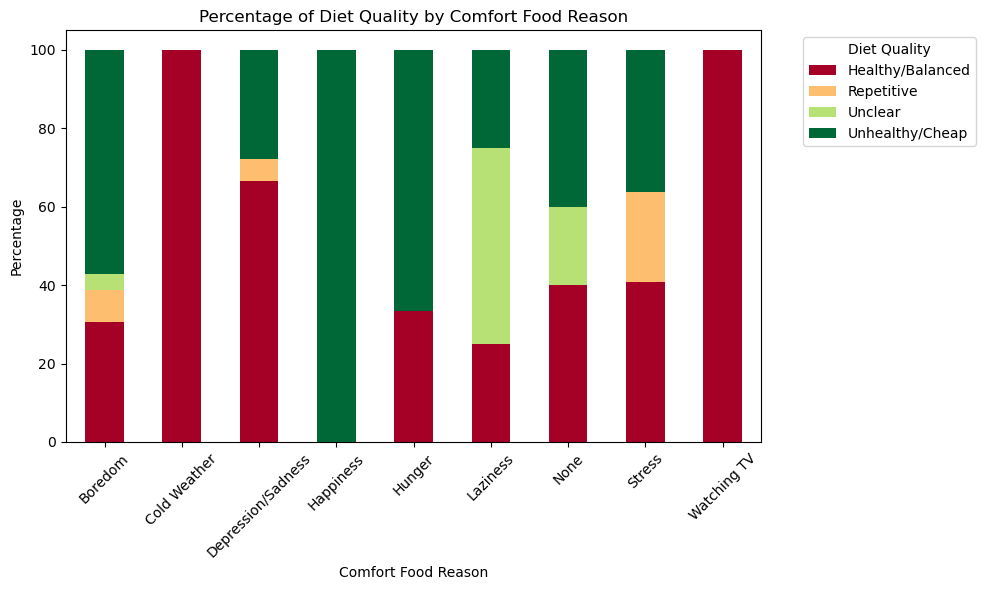

In [28]:
ct = pd.crosstab(df['comfort_reason'], df['diet_quality'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlGn')
plt.title('Percentage of Diet Quality by Comfort Food Reason')
plt.ylabel('Percentage')
plt.xlabel('Comfort Food Reason')
plt.legend(title='Diet Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('diet_by_reason.png')
plt.show()

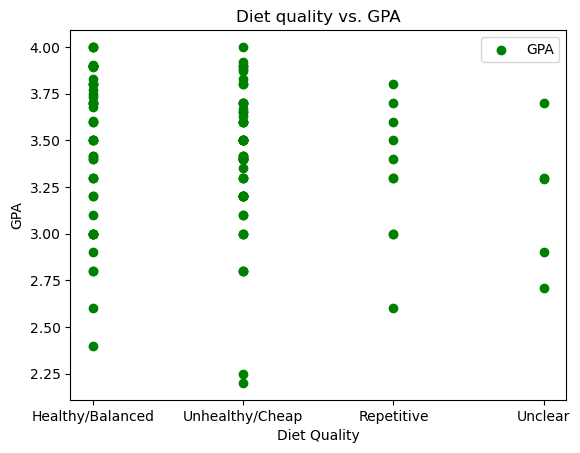

In [29]:
plt.scatter(df['diet_quality'], df['GPA'], color='Green', label='GPA')
plt.title('Diet quality vs. GPA')
plt.xlabel('Diet Quality')
plt.ylabel('GPA')
plt.legend()
plt.show()

/var/folders/rx/gf7_x1gs5pv1b_4ykdybgr5h0000gn/T/ipykernel_66291/3605797272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='comfort_reason', order=df['comfort_reason'].value_counts().index, palette='viridis')


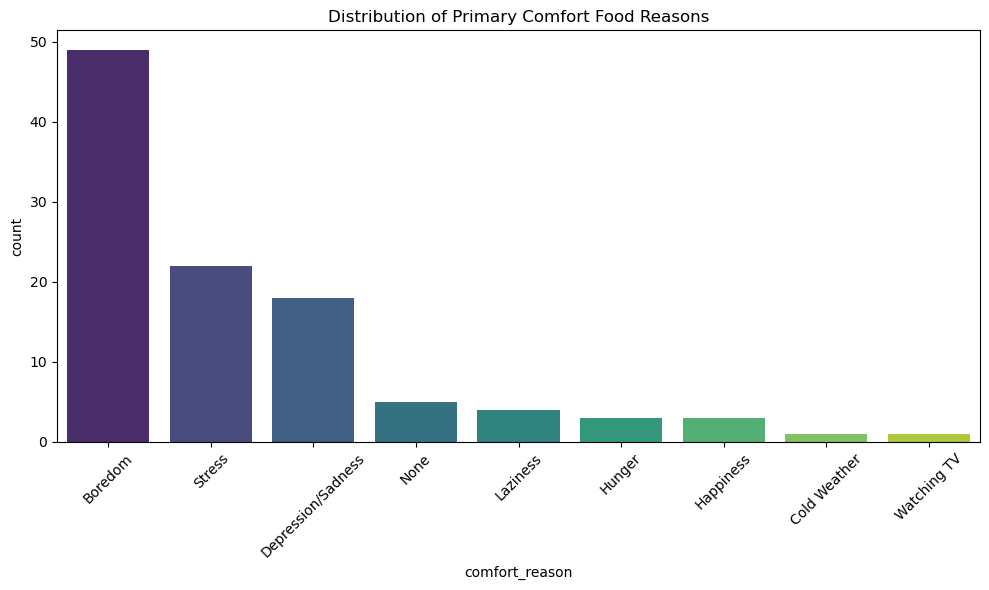

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='comfort_reason', order=df['comfort_reason'].value_counts().index, palette='viridis')
plt.title('Distribution of Primary Comfort Food Reasons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('comfort_reason_dist.png')
plt.show()

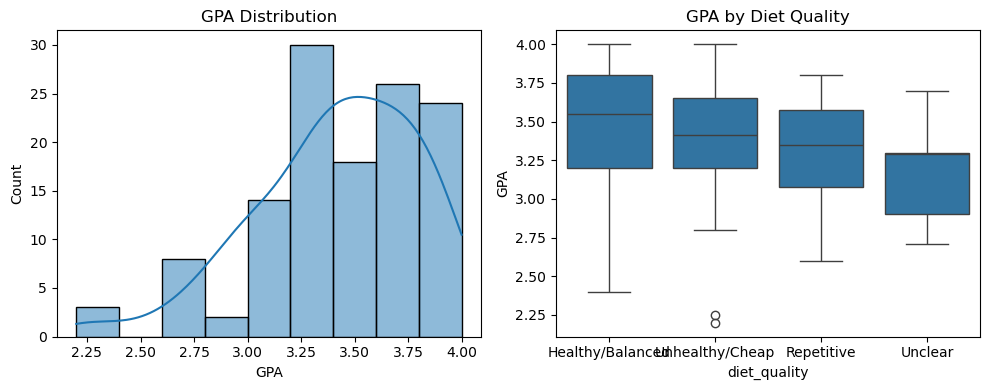

In [31]:
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['GPA'], kde = True)
plt.title('GPA Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'diet_quality', y = 'GPA')
plt.title('GPA by Diet Quality')
plt.tight_layout()
plt.show()

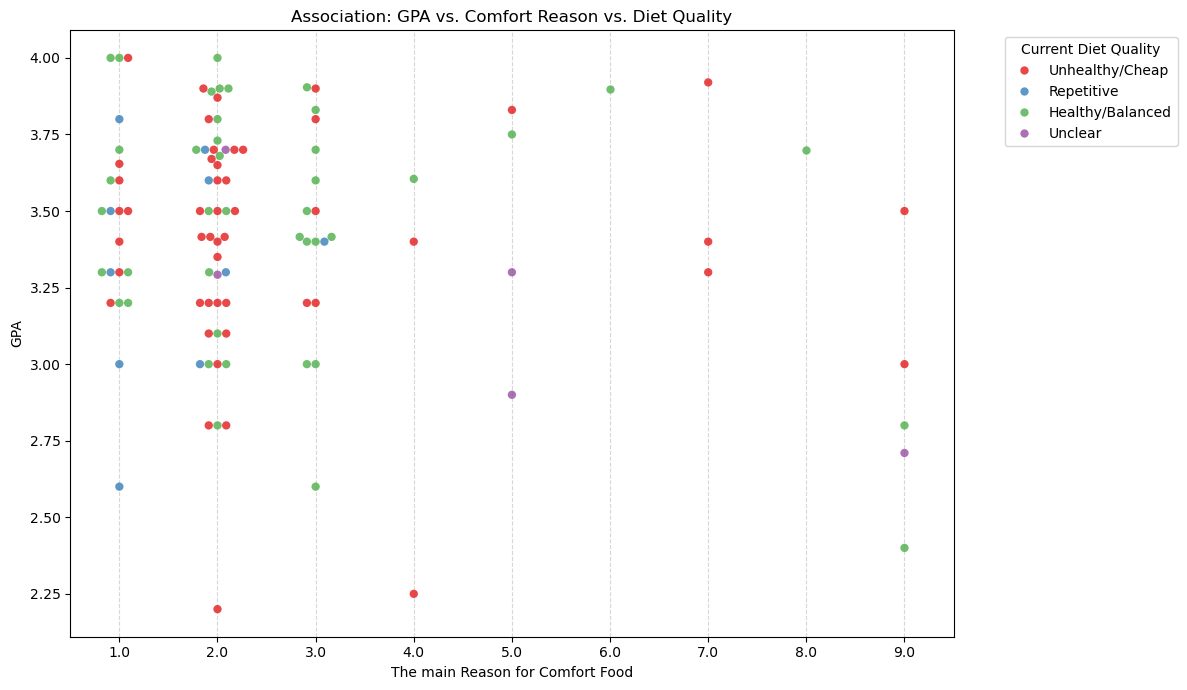

In [32]:
plt.figure(figsize=(12, 7))
sns.swarmplot(data=df.dropna(subset=['comfort_reason', 'diet_quality']), x= 'comfort_food_reasons_coded', y='GPA', hue='diet_quality', palette='Set1', size=6, alpha=0.8)
plt.title('Association: GPA vs. Comfort Reason vs. Diet Quality')
plt.xlabel('The main Reason for Comfort Food')
plt.ylabel('GPA')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.legend(title='Current Diet Quality', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

NameError: name 'p' is not defined

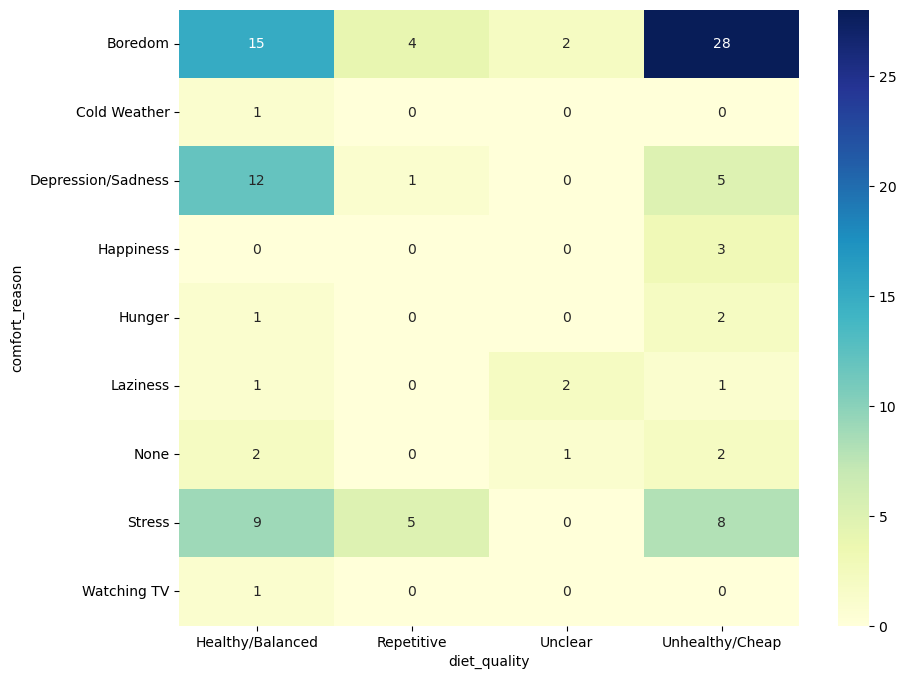

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'Heatmap: Comfort Reason vs Diet Quality\nChi-square p-value: {p:.4f}')
plt.xlabel('Diet Quality')
plt.ylabel('Comfort Reason')
plt.tight_layout()
plt.savefig('contingency_heatmap.png')
plt.show()

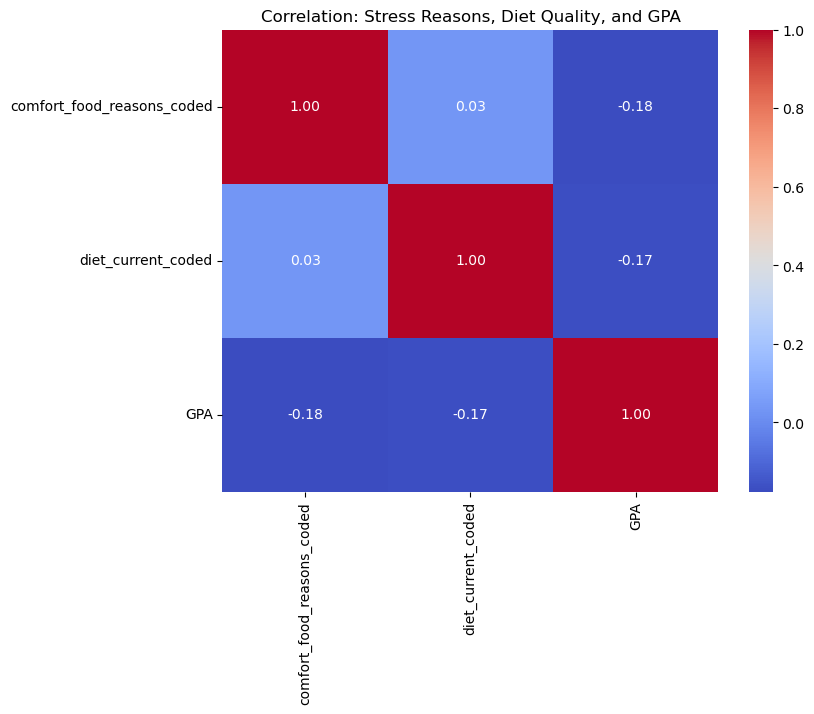

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce')
correlation_matrix = df[['comfort_food_reasons_coded', 'diet_current_coded', 'GPA']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation: Stress Reasons, Diet Quality, and GPA')
plt.show()

Here we had 9 different numbers for different reason for using comfort foods while our focus was more on stress or boredom so I've created these new columns to easily split the feature we want to focus on and change it to binary variable, stress eater(yes or no(0,1)), so it's made it easier for us to create visualization for GPA and Diet habit and quality and observe them just based on the being stress eater or not.

In [54]:
df['is_stress_eater'] = (df['comfort_food_reasons_coded'] == 1).astype(int)
df['is_boredom_eater'] = (df['comfort_food_reasons_coded'] == 2).astype(int)
print(df[['comfort_reason', 'is_stress_eater', 'is_boredom_eater']].head())

  comfort_reason  is_stress_eater  is_boredom_eater
0           None                0                 0
1         Stress                1                 0
2         Stress                1                 0
3        Boredom                0                 1
4         Stress                1                 0


Average GPA Comparison:
                  Not Stressed  Stressed Eaters
diet_quality                                   
Healthy/Balanced      3.458296         3.533333
Repetitive            3.400000         3.240000
Unclear               3.180400              NaN
Unhealthy/Cheap       3.386513         3.519250


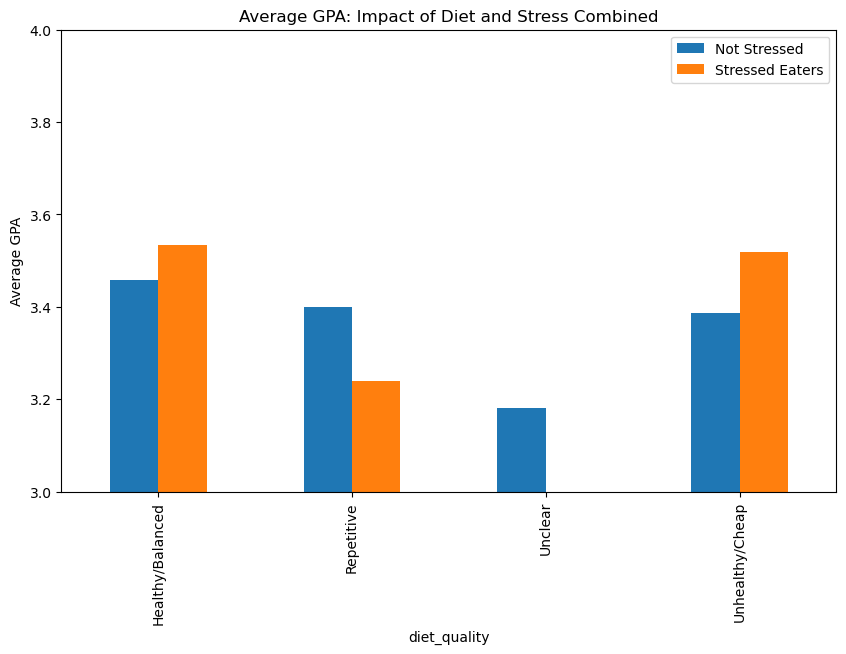

In [55]:
summary = df.groupby(['diet_quality', 'is_stress_eater'])['GPA'].mean().unstack()
summary.columns = ['Not Stressed', 'Stressed Eaters']

print("Average GPA Comparison:")
print(summary)
summary.plot(kind='bar', figsize=(10, 6))
plt.title('Average GPA: Impact of Diet and Stress Combined')
plt.ylabel('Average GPA')
plt.ylim(3.0, 4.0)
plt.show()

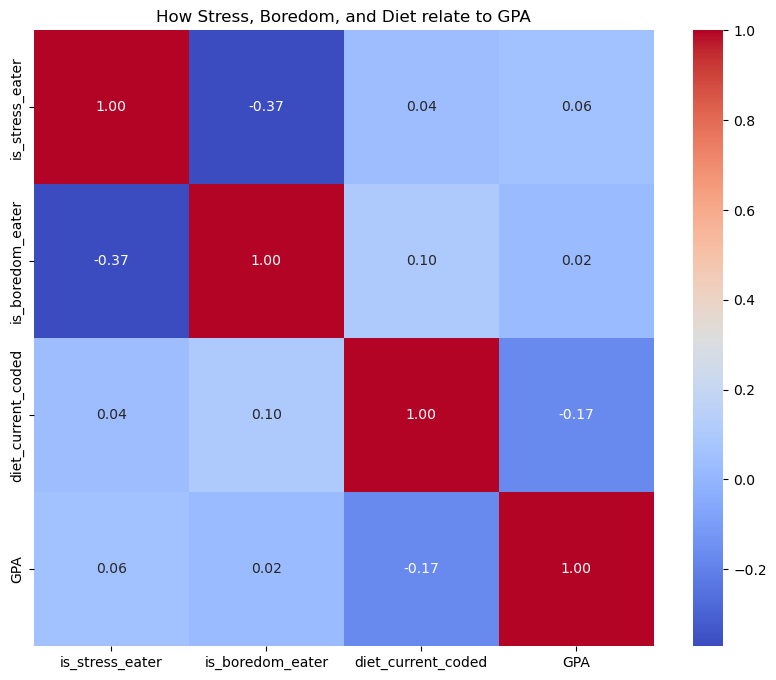

In [56]:
cols_to_check = ['is_stress_eater', 'is_boredom_eater', 'diet_current_coded', 'GPA']
correlation_matrix = df[cols_to_check].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('How Stress, Boredom, and Diet relate to GPA')
plt.show()

In [100]:
from scipy import stats
from scipy.stats import chi2_contingency
table = pd.crosstab(df['is_stress_eater'], df['diet_quality'])
chi2, p_chi, dof, ex = chi2_contingency(table)
print(f"Chi-Square P-Value: {p_chi:.4f}")

Chi-Square P-Value: 0.0284


Since the P_Value = 0.0284 and it is less than 0.05, so we can take that We have statistically significant proof that stress changes the diet quality.

In [95]:
from scipy.stats import ttest_ind
stress_gpa = df[df['is_stress_eater'] == 1]['GPA']
others_gpa = df[df['is_stress_eater'] == 0]['GPA']
t_stat, p_val = ttest_ind(stress_gpa, others_gpa)
print(f"T-Test Result (Stress vs GPA):")
print(f"P-value: {p_val:.4f}")
print(f"Mean GPA of Stress Eaters: {stress_gpa.mean():.2f}")
print(f"Mean GPA of Others: {others_gpa.mean():.2f}")

T-Test Result (Stress vs GPA):
P-value: 0.5363
Mean GPA of Stress Eaters: 3.46
Mean GPA of Others: 3.41


Because the p-value(0.5363) is greater than 0.05, we fail to reject the null hypothesis, it means that there is no statistically significant proof to shows that being a stress eater leads to a lower GPA

### General Overview and Insight from these tests:

It seems that being a stress eater can affect on quality of diet but it is not any association between stress and GPA, so in general stress can dcrease the quality of diet but not GPA.